# Finm35000 Data project 1

Team Members:
- Antonio Pineda Acosta
- Kaleem Shah Bukhari
- Raafay Uqailya
- Yasmine Ouattara

### Section 2: Measuring the tone of FOMC statements (90 points)

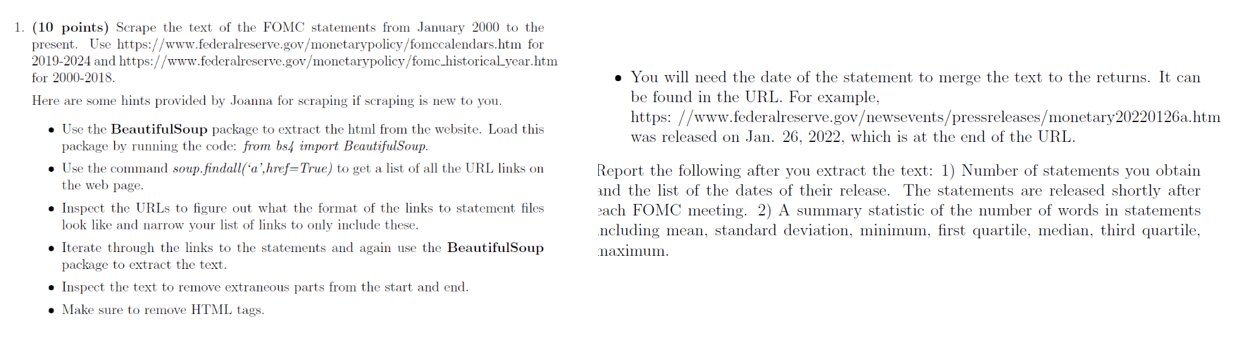

In [28]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re

## 2019-2024

In [29]:
# Function to extract the statement links from the 2019-2024 URL
def extract_statement_links_2019_2024(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Extract all URLs that contain 'pressrelease' (which likely include FOMC statements)
    fomc_links = soup.find_all('a', href=True)
    
    # Filter links for FOMC statements based on a common pattern in the URL
    statement_links = [link['href'] for link in fomc_links if 'pressrelease' in link['href']]
    return statement_links

# Function to clean and extract the relevant FOMC statement text
def extract_statement_text_2019_2024(links):
    base_url = "https://www.federalreserve.gov"
    statements = []
    dates = []
    
    for link in links:
        full_url = base_url + link  # Construct the full URL
        statement_response = requests.get(full_url)
        
        # Fix encoding issues by decoding the content as UTF-8
        statement_soup = BeautifulSoup(statement_response.content.decode('utf-8'), 'html.parser')
        
        # Extract the entire text of the page
        full_text = statement_soup.get_text().strip()

        # Find the start of the relevant FOMC statement
        start_marker = "Please enable JavaScript if it is disabled in your browser or access the information through the links provided below."
        end_marker = "About the FedNews & EventsMonetary PolicySupervision & RegulationFinancial StabilityPayment SystemsEconomic ResearchDataConsumers & CommunitiesConnect with the Board"
        
        start_index = full_text.find(start_marker)
        end_index = full_text.find(end_marker)
        
        if start_index != -1 and end_index != -1:
            # Extract the relevant portion of the text between the start and end markers
            relevant_text = full_text[start_index + len(start_marker):end_index]
            
            # Extract date from the URL using regex (as an example of 20220126a.htm)
            match = re.search(r'(\d{8})a\.htm', link)
            
            if relevant_text and match:  # Ensure both statement text and date are found
                date = match.group(1)  # Extracts the date part (e.g., 20220126)
                dates.append(date)
                statements.append(relevant_text.strip())
    
    return statements, dates

# URL for scraping 2019-2024 statements
url_2019_2024 = "https://www.federalreserve.gov/monetarypolicy/fomccalendars.htm"

# Extract statement links for the 2019-2024 period
statement_links_2019_2024 = extract_statement_links_2019_2024(url_2019_2024)

# Extract statement texts and dates for the 2019-2024 period
statements_2019_2024, dates_2019_2024 = extract_statement_text_2019_2024(statement_links_2019_2024)

# Create a dataframe for the 2019-2024 period
data_2019_2024 = {'Date': dates_2019_2024, 'Statement Text': statements_2019_2024}
df_2019_2024 = pd.DataFrame(data_2019_2024)

#from Date make this format 2000-01-19
df_2019_2024['Date'] = pd.to_datetime(df_2019_2024['Date'], format='%Y%m%d')
df_2019_2024['Date'] = df_2019_2024['Date'].dt.strftime('%Y-%m-%d')

# Save the DataFrame to an Excel file
#output_file_path_2019_2024 = 'FOMC_statements_2019_2024.xlsx'
#df_2019_2024.to_excel(output_file_path_2019_2024, index=False)

# Display the DataFrame for verification
#df_2019_2024.head()

## 2000-2018

In [30]:
# List of specific dates to remove
dates_to_remove = [
    "1996-10-01", "1996-12-01", "1997-01-01", "1997-03-01", "1997-05-01", "1997-06-01",
    "1997-08-01", "1997-09-01", "1997-10-01", "1997-12-01", "1998-01-01", "1998-03-01",
    "1998-05-01", "1998-06-01", "1998-08-01", "1998-09-01", "1998-11-01", "1998-12-01",
    "1999-01-01", "1999-03-01", "1999-05-01", "1999-06-01", "1999-08-01", "1999-09-01",
    "1999-11-01", "1999-12-01", "2000-01-01", "2000-03-01", "2000-05-01", "2000-06-01",
    "2000-08-01", "2000-09-01", "2000-11-01", "2000-12-01", "2001-01-01", "2001-03-01",
    "2001-05-01", "2001-06-01", "2001-08-01", "2001-09-01", "2001-10-01", "2001-11-01",
    "2002-01-01", "2002-03-01", "2002-04-01", "2002-06-01", "2002-07-01", "2002-10-01",
    "2002-11-01", "2003-01-01", "2003-03-01", "2003-04-01", "2003-06-01", "2003-07-01",
    "2003-10-01", "2003-11-01", "2004-01-01", "2004-03-01", "2004-04-01", "2004-06-01",
    "2004-07-01", "2004-09-01", "2004-10-01", "2004-12-01", "2005-01-01", "2005-03-01",
    "2005-04-01", "2005-06-01", "2005-07-01", "2005-09-01", "2005-10-01", "2005-11-01",
    "2006-01-01", "2006-03-01", "2006-04-01", "2006-06-01", "2006-07-01", "2006-09-01",
    "2006-10-01", "2006-11-01", "2007-01-01", "2007-03-01", "2007-04-01", "2007-06-01",
    "2007-07-01", "2007-09-01", "2007-10-01", "2007-11-01", "2008-01-01", "2008-03-01",
    "2008-04-01", "2008-06-01", "2008-07-01", "2008-09-01", "2008-10-01", "2008-12-01",
    "2009-01-01", "2009-03-01", "2009-04-01", "2009-06-01", "2009-07-01", "2009-09-01",
    "2009-10-01", "2009-12-01", "2010-01-01", "2010-03-01", "2010-04-01", "2010-06-01",
    "2010-07-01", "2010-09-01", "2010-10-01", "2010-12-01"
]

In [31]:
# Function to extract the statement links for a given year based on its period
def extract_yearly_links(year):
    if 2000 <= year <= 2010:
        url = f"https://www.federalreserve.gov/monetarypolicy/fomchistorical{year}.htm"
        link_pattern = r'/fomc/beigebook/\d{4}/\d{8}/default.htm'
    elif 2011 <= year <= 2016:
        url = f"https://www.federalreserve.gov/monetarypolicy/beigebook/beigebook{year}.htm"
        link_pattern = r'/monetarypolicy/beigebook/beigebook\d{6}.htm'
    else:  # 2017-2018
        url = f"https://www.federalreserve.gov/monetarypolicy/beigebook{year}.htm"
        link_pattern = r'/monetarypolicy/beigebook\d{6}.htm'

    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    links = soup.find_all('a', href=True)
    
    # Filter only the relevant Beige Book links based on the year pattern
    relevant_links = [link['href'] for link in links if re.search(link_pattern, link['href'])]
    
    return relevant_links

# Function to extract the statement text from an HTML link
def extract_statement_text(link):
    base_url = "https://www.federalreserve.gov"
    full_url = base_url + link if link.startswith('/') else base_url + '/' + link
    response = requests.get(full_url)
    soup = BeautifulSoup(response.content, 'html.parser')
    text = soup.get_text().strip()
    
    # Phrase that marks the start of relevant content
    start_marker = "the views of Federal Reserve officials."
    # Find the starting point in the text
    start_index = text.find(start_marker)
    
    if start_index != -1:
        # Extract the relevant part after the start_marker
        relevant_text = text[start_index + len(start_marker):].strip()
        return relevant_text
    else:
        # If the start marker is not found, return None
        return None

# Function to extract FOMC statements for a given year range
def extract_fomc_statements(start_year, end_year):
    all_statements = []
    all_dates = []

    for year in range(start_year, end_year + 1):
        print(f"Processing year: {year}")
        links = extract_yearly_links(year)

        for link in links:
            if year <= 2010:
                match = re.search(r'/fomc/beigebook/(\d{4})/(\d{8})/default.htm', link)
            else:
                match = re.search(r'beigebook(\d{4})(\d{2})', link)

            if match:
                if year <= 2010:
                    date = match.group(2)
                else:
                    year_str = match.group(1)
                    month = match.group(2)
                    date = f"{year_str}{month}01"

                if date not in all_dates:  # Prevent duplicate entries
                    statement_text = extract_statement_text(link)
                    if statement_text:  # Only append if the relevant text is found
                        all_dates.append(date)
                        all_statements.append(statement_text)

    # Convert the date strings to datetime objects for filtering and sorting
    all_dates = pd.to_datetime(all_dates, format='%Y%m%d')
    
    # Create a DataFrame with the filtered and ordered data
    df = pd.DataFrame({'Date': all_dates, 'Statement Text': all_statements})

    # Filter out the specific dates we want to remove
    df = df[~df['Date'].isin(pd.to_datetime(dates_to_remove))]

    df = df.sort_values(by='Date')  # Sort by date

    return df

# Extract statements for each period and combine them
df_2000_2010 = extract_fomc_statements(2000, 2010)
df_2011_2016 = extract_fomc_statements(2011, 2016)
df_2017_2018 = extract_fomc_statements(2017, 2018)

# Merge all the DataFrames into one
df_2000_2018 = pd.concat([df_2000_2010, df_2011_2016, df_2017_2018])

# Save the final DataFrame to a single Excel file
#output_file_path = 'FOMC_statements_2000_2018_filtered_cleaned.xlsx'
#df_2000_2018.to_excel(output_file_path, index=False)

# Display the merged DataFrame for verification
#df_2000_2018

Processing year: 2000
Processing year: 2001
Processing year: 2002
Processing year: 2003
Processing year: 2004
Processing year: 2005
Processing year: 2006
Processing year: 2007
Processing year: 2008
Processing year: 2009
Processing year: 2010
Processing year: 2011
Processing year: 2012
Processing year: 2013
Processing year: 2014
Processing year: 2015
Processing year: 2016
Processing year: 2017
Processing year: 2018


## Statistics

In [38]:
# Merge all the DataFrames into one
df_all_years = pd.concat([df_2000_2018, df_2019_2024])

# Ensure 'Date' column is in datetime format
df_all_years['Date'] = pd.to_datetime(df_all_years['Date'])

# Order by date
df_all_years = df_all_years.sort_values(by='Date')

#df_all_years.head()
df_all_years.tail()

,Date,Statement Text
1,2024-03-20,"March 20, 2024\nFederal Reserve issues FOMC st..."
2,2024-05-01,"May 01, 2024\nFederal Reserve issues FOMC stat..."
3,2024-06-12,"June 12, 2024\nFederal Reserve issues FOMC sta..."
4,2024-07-31,"July 31, 2024\nFederal Reserve issues FOMC sta..."
5,2024-09-18,"September 18, 2024\nFederal Reserve issues FOM..."


In [39]:
# Add the word count for each statement
df_all_years['Word Count'] = df_all_years['Statement Text'].apply(lambda x: len(x.split()))

# Calculate summary statistics for the word count
summary_stats = df_all_years['Word Count'].describe()

# Display the summary statistics
print(summary_stats)

count      170.000000
mean      7124.458824
std       7892.273684
min        163.000000
25%        526.500000
50%       2032.000000
75%      17232.500000
max      20050.000000
Name: Word Count, dtype: float64


In [ ]:
# Save the final DataFrame and summary statistics to a single Excel file
output_file_path = 'FOMC_statements_with_summary_statistics.xlsx'

# Save both the data and the summary statistics in the same Excel file using ExcelWriter
with pd.ExcelWriter(output_file_path) as writer:
    df_all_years.to_excel(writer, sheet_name='FOMC Statements', index=False)
    summary_stats.to_frame(name='Summary Statistics').to_excel(writer, sheet_name='Summary Statistics')